# Initial Imports

In [33]:
import pandas as pd 
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
nltk.download('punkt')  # Download the tokenizer models
nltk.download('stopwords')  # Download stopwords list

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Accessing and Reading Data

In [34]:
df = pd.read_csv('../data/raw/IMDB Dataset.csv')

In [35]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# EDA

In [36]:
df.nunique()

review       49582
sentiment        2
dtype: int64

In [37]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [38]:
df.shape

(50000, 2)

In [39]:
df.dtypes

review       object
sentiment    object
dtype: object

In [40]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [42]:
df.duplicated().sum()

np.int64(418)

# Data preprocessing

In [43]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [44]:
import re

def remove_html_tags(text):
    """This function removes html tags from our data"""
    return re.sub(r'<.*?>', '', text)

In [45]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

def preprocess_text(text):
    """This function preprocesses text (removing stopwords, tokenization, etc.)"""
    # Remove HTML Tags
    text = remove_html_tags(text)
    
    # Tokenize Text
    tokens = word_tokenize(text)
    
    # Lowercase everything
    tokens = [word.lower() for word in tokens]
    
    #Remove Newlines
    tokens = [word.strip() for word in tokens]
    
    # Remove Stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    
    return filtered_tokens

In [46]:
df['review'] = df['review'].apply(preprocess_text)

In [47]:
df['review'] = df['review'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

In [48]:
# Saving new data for future reference
cleaned_data = df[['review', 'sentiment']]  # After text preprocessing

# Save as CSV
cleaned_data.to_csv('../data/processed/cleaned_reviews.csv', index=False)

# Text Vectorization

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [50]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['review'])

# Prepare Labels

In [51]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(df['sentiment'])

# Train, Test Split and Model Training

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, df['sentiment'], test_size=0.2, random_state=42)

In [53]:
from sklearn.linear_model import LogisticRegression

log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)

LogisticRegression()

In [54]:
from sklearn.naive_bayes import MultinomialNB

naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train, y_train)

MultinomialNB()

# Model Results And Evaluation

In [55]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

log_reg_predictions = log_reg_model.predict(X_test)
print('Logistic Regression Model Results: ', '\n')
print(classification_report(y_test, log_reg_predictions),'\n')
print(confusion_matrix(y_test, log_reg_predictions),'\n')
print(accuracy_score(y_test, log_reg_predictions), '\n')

naive_bayes_predictions = naive_bayes_model.predict(X_test)
print('MultinominalNB Model Results: ', '\n')
print(classification_report(y_test, naive_bayes_predictions),'\n')
print(confusion_matrix(y_test, naive_bayes_predictions),'\n')
print(accuracy_score(y_test, naive_bayes_predictions))

Logistic Regression Model Results:  

              precision    recall  f1-score   support

    negative       0.91      0.88      0.89      4961
    positive       0.89      0.91      0.90      5039

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000
 

[[4366  595]
 [ 453 4586]] 

0.8952 

MultinominalNB Model Results:  

              precision    recall  f1-score   support

    negative       0.86      0.88      0.87      4961
    positive       0.88      0.86      0.87      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000
 

[[4361  600]
 [ 729 4310]] 

0.8671


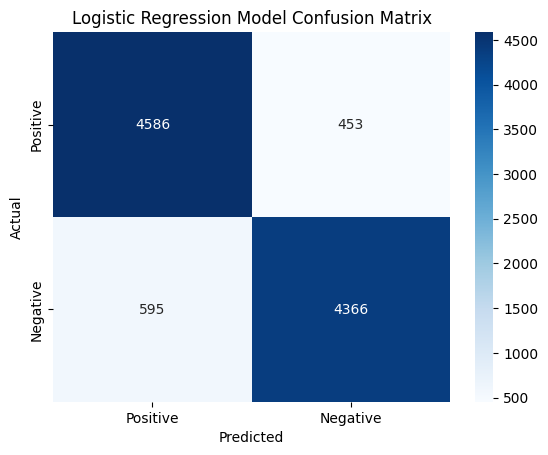

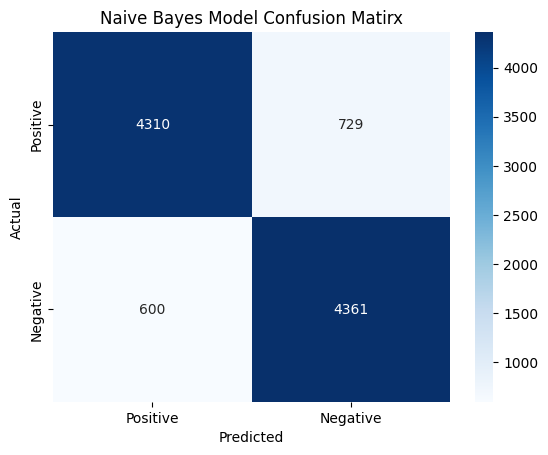

In [56]:
cm = confusion_matrix(y_test, log_reg_predictions, labels=['positive', 'negative'])
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Model Confusion Matrix')
plt.show()

cm = confusion_matrix(y_test, naive_bayes_predictions, labels=['positive', 'negative'])
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Naive Bayes Model Confusion Matirx')
plt.show()

In [57]:
def display_classification_report(y_true, y_pred, title="Classification Report"):
    report = classification_report(y_true, y_pred, output_dict=True)
    df = pd.DataFrame(report).transpose()
    print(title)
    display(df.style.background_gradient(cmap='Blues'))

display_classification_report(y_test, log_reg_predictions, "Logistic Regression")
display_classification_report(y_test, naive_bayes_predictions, "Naive Bayes")

Logistic Regression


,precision,recall,f1-score,support
negative,0.905997,0.880065,0.892843,4961.000000
positive,0.885157,0.910101,0.897456,5039.000000
accuracy,0.895200,0.895200,0.895200,0.895200
macro avg,0.895577,0.895083,0.895149,10000.000000
weighted avg,0.895496,0.895200,0.895167,10000.000000


Naive Bayes


,precision,recall,f1-score,support
negative,0.856778,0.879057,0.867774,4961.000000
positive,0.877800,0.855328,0.866419,5039.000000
accuracy,0.867100,0.867100,0.867100,0.867100
macro avg,0.867289,0.867193,0.867097,10000.000000
weighted avg,0.867371,0.867100,0.867091,10000.000000


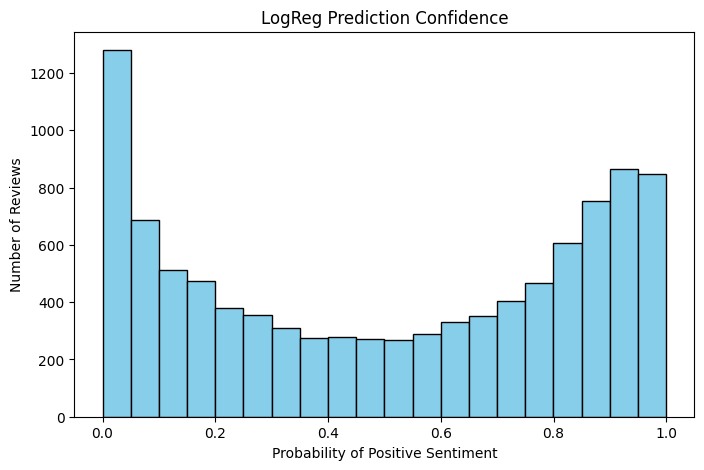

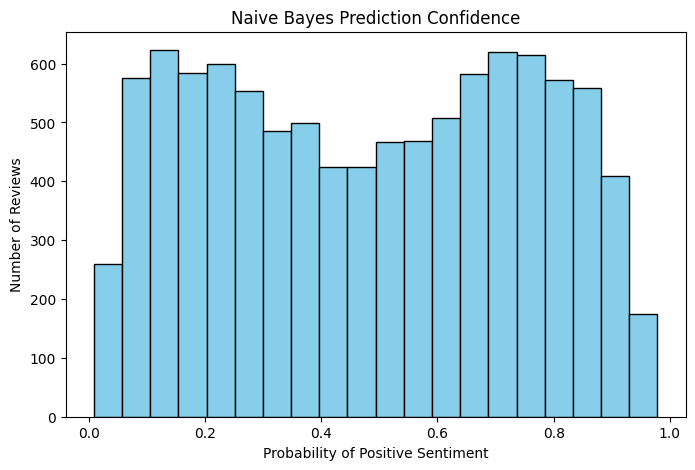

In [58]:
def plot_prediction_probs(probs, title="Prediction Probability Distribution"):
    plt.figure(figsize=(8,5))
    plt.hist(probs, bins=20, color='skyblue', edgecolor='black')
    plt.title(title)
    plt.xlabel("Probability of Positive Sentiment")
    plt.ylabel("Number of Reviews")
    plt.show()


log_reg_probs = log_reg_model.predict_proba(X_test)[:, 1]
plot_prediction_probs(log_reg_probs, "LogReg Prediction Confidence")
naive_bayes_probs = naive_bayes_model.predict_proba(X_test)[:, 1]
plot_prediction_probs(naive_bayes_probs, "Naive Bayes Prediction Confidence")

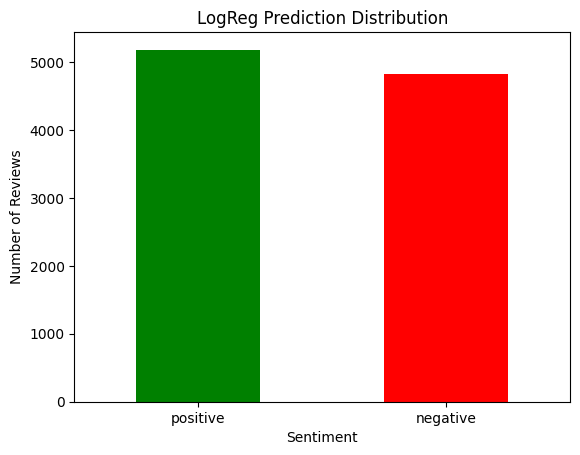

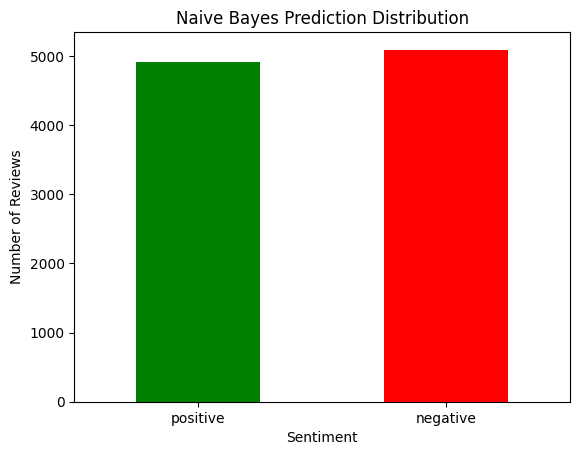

In [59]:
def plot_sentiment_distribution(predictions, title="Sentiment Distribution"):
    sentiment_counts = pd.Series(predictions).value_counts()
    sentiment_counts = sentiment_counts.reindex(['positive', 'negative'])  
    sentiment_counts.plot(kind='bar', color=['green', 'red'])
    plt.title(title)
    plt.xlabel("Sentiment")
    plt.ylabel("Number of Reviews")
    plt.xticks(rotation=0)
    plt.show()

plot_sentiment_distribution(log_reg_predictions, "LogReg Prediction Distribution")
plot_sentiment_distribution(naive_bayes_predictions, "Naive Bayes Prediction Distribution")

# Saving Model And Vectorizer To Models Folder

In [60]:
import pickle

# Save the Logistic Regression model to a file
with open('../models/LogisticRegression_model.pkl', 'wb') as logreg_model_file:
    pickle.dump(log_reg_model, logreg_model_file)

# Save the Naive Bayes model to a file
with open('../models/NaiveBayes_model.pkl', 'wb') as nb_model_file:
    pickle.dump(naive_bayes_model, nb_model_file)

# Save the TF-IDF vectorizer to a file
with open('../models/tfidf_vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(tfidf, vectorizer_file)
    
with open('../data/y_test.pkl', 'wb') as f:
    pickle.dump(y_test, f)

with open('../data/log_reg_preds.pkl', 'wb') as f:
    pickle.dump(log_reg_predictions, f)

with open('../data/nb_preds.pkl', 'wb') as f:
    pickle.dump(naive_bayes_predictions, f)